In [108]:
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
#f_path = "/Library/Fonts/AppleGothic.ttf (맥, Mac)
f_path = "C:/Windows/Fonts/malgun.ttf"
#(윈도우즈,Windows)
font_name = font_manager.FontProperties(fname= f_path).get_name()
rc('font', family = font_name)

In [109]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
titanic = pd.read_excel('../data/titanic.xls')
titanic.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


### 1. 전체승객을 나이별로 히스토그램으로 나타내세요.

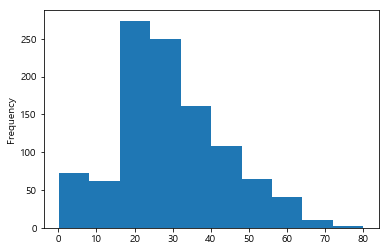

In [110]:
ax = plt.subplots()
ax = titanic['age'].plot.hist()

### 2. 남 여 승객수를 나타내시오

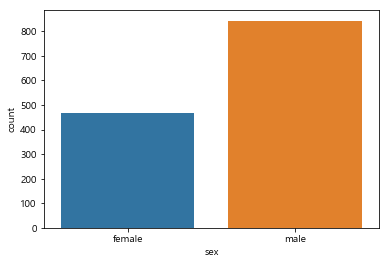

In [111]:
ax = plt.subplots()
ax = sns.countplot('sex', data = titanic)

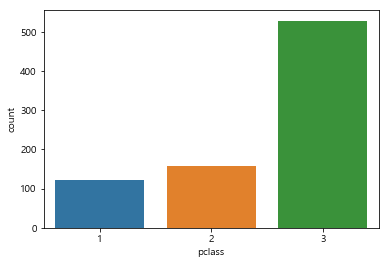

In [112]:
ax = plt.subplots()
titanic_died = titanic[titanic['survived']==0]
ax = sns.countplot(x = 'pclass',data = titanic_died)


###  2.2 객실 별 승객 수 

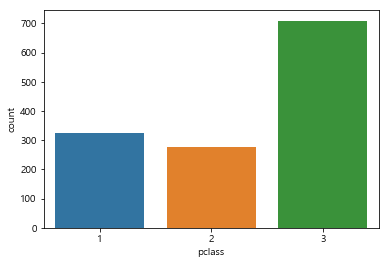

In [113]:
ax = plt.subplots()
ax = sns.countplot(x ='pclass', data = titanic)

### 3. 사망자와 생존자를 출력해 보세요(pie)


In [114]:
titanicss = titanic.groupby(['survived']).count()
titanicss

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
survived,,,,,,,,,,,,,
0,809,809,809,619,809,809,809,808,102,809,9,121,398
1,500,500,500,427,500,500,500,500,193,498,477,0,347


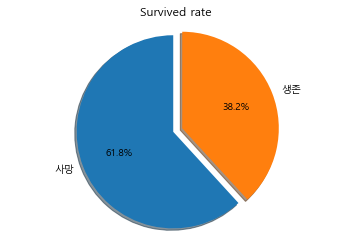

In [115]:
fig1, ax1 = plt.subplots()
ax1.pie(titanicss['sex'], explode = (0.1,0), labels = ['사망', '생존'], autopct = '%1.1f%%', shadow = True, startangle = 90)
ax1.axis('equal')
ax1.set_title('Survived rate ')
plt.show()

### 4. 남/여 성별 사망자와 생존자를 나타내 보세요

In [116]:
def recode_survived(survived):
    if survived == 0:
        return 'Died'
    else: return 'Survived'

    
titanic['recode_survived'] = titanic['survived'].apply(recode_survived) 

Text(0,0.5,'Count')

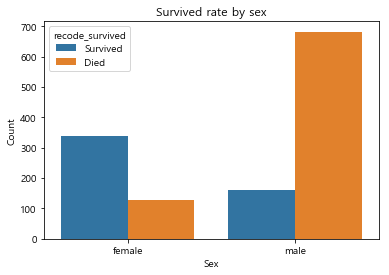

In [117]:
ax = plt.subplots()
ax = sns.countplot('sex', hue = 'recode_survived', data = titanic)
ax.set_title('Survived rate by sex')
ax.set_xlabel('Sex')
ax.set_ylabel('Count')